# 09 - Comparação



A pergunta a ser respondida é "Para quais tamanhos de entrada, o valor da mochila fica maior em 50% pela busca global do que pela busca heurística e o tempo for menor que o dobro do tempo da heurística?


vale a pena esperar pela busca global? Até que ponto?

Reformulação da pergunta:

Como o tempo de execução da global se compara com a local. Qual é o custo disso (em relação ao valor obtido)

In [8]:
import subprocess
import time
import os, os.path
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
execs = ['../07-busca-local/busca-local', 
'../05-heuristicas/mais-caro',]
ins = ['./in/in-aula.txt',
'./in/in1.txt',
'./in/in2.txt',
'./in/in3.txt',
'./in/in4.txt',
'./in/in5.txt',]

In [34]:
def executeAndParseResults(executavel, arquivo_in):
    with open(f'{arquivo_in}') as f:
        entrada = f.read()
        start = time.perf_counter()
        proc = subprocess.run([executavel], input=entrada, text=True, capture_output=True)
        end = time.perf_counter()

    entrada = entrada.split()
    entrada_r = {'pesoMax': entrada[1], 'N': entrada[0]}
    
    if (proc.stderr):
        raise Exception('Erro no programa')
    std = proc.stdout
    stdout = std.split()
    resultados = {'peso': stdout[0], 'valor': stdout[1], 'objetos': stdout[3:]}
    
    execTime = end-start
    return (entrada_r, resultados, execTime)

In [35]:
def geraDF(executavel, ins):
    resultados = []
    for i in ins:
        resultados.append(executeAndParseResults(executavel, i))

    df = pd.DataFrame()
    df['tempo'] = [i[2] for i in resultados]
    df['N'] = [int(i[0]['N']) for i in resultados]
    df['valor'] = [int(i[1]['valor']) for i in resultados]
    
    # como existe uma pequena variação no tempo de execução para cada N,
    # vamos usar o tempo médio dos Ns para melhor visualização gráfica
    return df.groupby(['N']).mean()

In [36]:
resGlobal = geraDF(execs[0], ins)
resLocal = geraDF(execs[1], ins)

In [37]:
resGlobal

,tempo,valor
N,,
5,0.006596,75.333333
10,0.006376,224.000000
100,0.005596,415.000000


In [38]:
resLocal

,tempo,valor
N,,
5,0.007185,75.333333
10,0.007268,251.000000
100,0.010134,513.000000


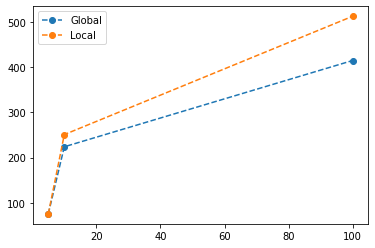

In [39]:
plt.plot(resGlobal['valor'], 'o--', label='Global')
plt.plot(resLocal['valor'], 'o--', label='Local')
# plt.xscale('log')
# plt.yscale('log')
plt.legend()
plt.show()

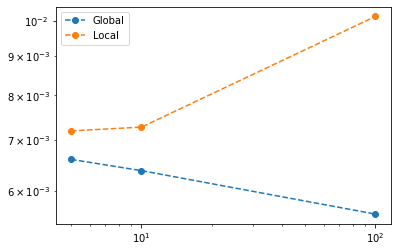

In [40]:
plt.plot(resGlobal['tempo'], 'o--', label='Global')
plt.plot(resLocal['tempo'], 'o--', label='Local')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()